# Phenology practical

In [1]:
# Initial set-up
import numpy as np
import matplotlib

%matplotlib inline

from phenology import *

Phenology refers to the study of timing of recurrent events, such as leaf emergence, leaf fall, etc. In the context of carbon science, the timing of emergence of leaves and the duration of the leaf-on period is crucial to understand the impact of decidious trees on atmospheric carbon levels. The timing of vegetation is also important from the point of view of other ecosystem components: vegetation flowering dates and fruit production are an important constraint on the temporal behaviour of fruit-eating wildlife, for example. Phenology is also important in agricultural practices, as certain management practices are only applied at particular phenological stages of crop development.

Monitoring phenology is important also because plant phenology reacts to a warmer climate, where leaf emergence happens earlier, and leaf fall happens later due to milder winters. Historically, researchers have recorded bud burst, date of flowering and leaf fall, breeding times, etc. for individual species. Phenology networks such as the [USA’s phenology network](http://www.usanpn.org/home) or efforts such as the UK’s [NatureCalendar](http://www.naturescalendar.org.uk/) rely on meticulous observation of phenology events by dedicated researchers and members of the public. While these efforts are invaluable, and often allow the extension of data series way back in the past, they tend to only monitor a handful of species over a limited geographical extent. Vegetation indices, such as NDVI or EVI, broadly respond to the amount of vegetation within the scene, and typical temporal trajectories can be used to track the temporal development of vegetation and can be related to phenology measurements in the ground.

![NDVI time series](http://www2.geog.ucl.ac.uk/~plewis/geogg124/_images/ndvi_annual_trend.png "NDVI time series")

The monthly NDVI trajectory for a site located in the UK for 2002.

These measurements do not track individual species, as the footprint of typical sensors such as MODIS, AVHRR or MERIS is of a few hundred meters, and will usually result in a mixture of species. A further complication is that the VI is a combination of soil (and snow) reflectance and vegetation biochemical composition and structure, so it is hard to associate any point in a typical trajectory with particular phenological events such as budburst or leaf fall. In these cases, simple phenology models can be used to interpret the signal. In effect, these models provide mathematical functions for that adequately fit the observed vegetation index. Points of interest in these trajectories can then be easily calculated (for example, location of the maximum VI value, inflexion points indicating start and end of the green period, total lenght of photosynthetically active period, etc.).

## Computer code

Some data and code has been provided for you to visualise VI trajectories. The data used are stored in UCL's UNIX system, so you will need to be logged on to the system to access the data. Most of the code you need is in [`phenology.py](https://gist.githubusercontent.com/jgomezdans/d84f09e226c4a0f98a52/raw/pheno_utils.py), but we will download it automatically below.

We shall be using the MODIS monthly NDVI product, gridded to a global grid of 1.5×1.5 degrees. The function get_ndvi will get and plot the complete time series for a given logitude and latitude. For example, this plots the NDVI for the gridcell that covers the [Hainich FluxNet](http://www.bgc-jena.mpg.de/public/carboeur/sites/hainich.html) site, an area in eastern Germany where trees are mostly decidious (beech).

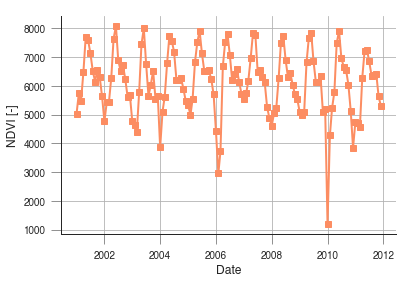

In [2]:
ndvi = get_ndvi ( 10.25, 51.05, plot=True ) # NDVI around Hainich FluxNET site.

The following plot shows some location near the city of Tomsk, in Siberia.

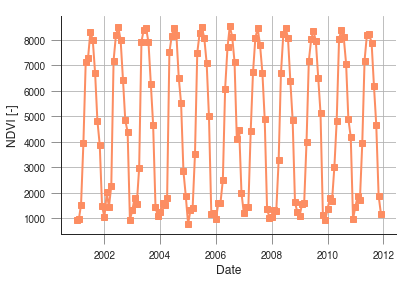

In [3]:
ndvi = get_ndvi ( 86, 57, plot=True) # NDVI around Siberia

This is the NDVI temporal trajectory for the [Tumbarumba Fluxnet](http://www.ozflux.org.au/monitoringsites/tumbarumba/) site in Australia:

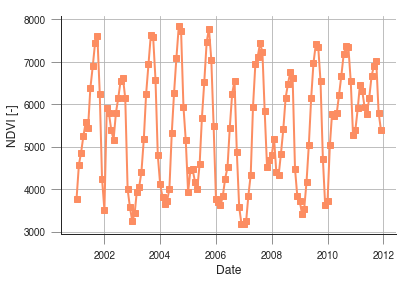

In [4]:
ndvi = get_ndvi ( 148, -35, plot=True) # Tumbarumba, Oz

### Exercise

Try a few sites with different latitude and longitudes, and discuss what the differences are.

##  AGDD: Accumulated Growing Degree Days

Most models of phenology, at least those used in DGVMs, have some concept of temperature constraint, essentially because the rate of chemical reactions increases with temperature. Plants also tend to have operating ranges, so there is an optimimum rage of temperatures for photosynthesis which vary with plant species. Typically, the lower bound of the operating temperatures with be above zero oC as water will tend to stop flowing in the plant at temperatures below this.

The concept of Accumulated Growing Degree Days (AGDD) is often a better metric with which to track phenology. This is in essence a cumulative integral (with some thresholds):
$$
AGDD = \sum_{t=0}^{t=tmax}{T'(t)}
$$

where

$$
\begin{split}
T'(t) = \left\{ \begin{array}{l l} 0 & \quad \text{if $T(t) <= T_{base}$}\\ T(t)-T_{base} & \quad \text{if $T_{base} < T(t) < T_{max}$}\\0 & \quad \text{if $T(t) >= T_{max}$} \end{array} \right.\end{split}
$$

So, we don’t progress the phenology if the daily temperature is greater than the maximum threshold or less than the lower threshold and otherwise we increment by the daily temperature (minus the lower threshold).

Data from the [ERA interim archive](http://data-portal.ecmwf.int/data/d/interim_daily/) have been prepared. The data available for this practial is the mean daily temperature. Some functions have been provided for you to access the data easily:

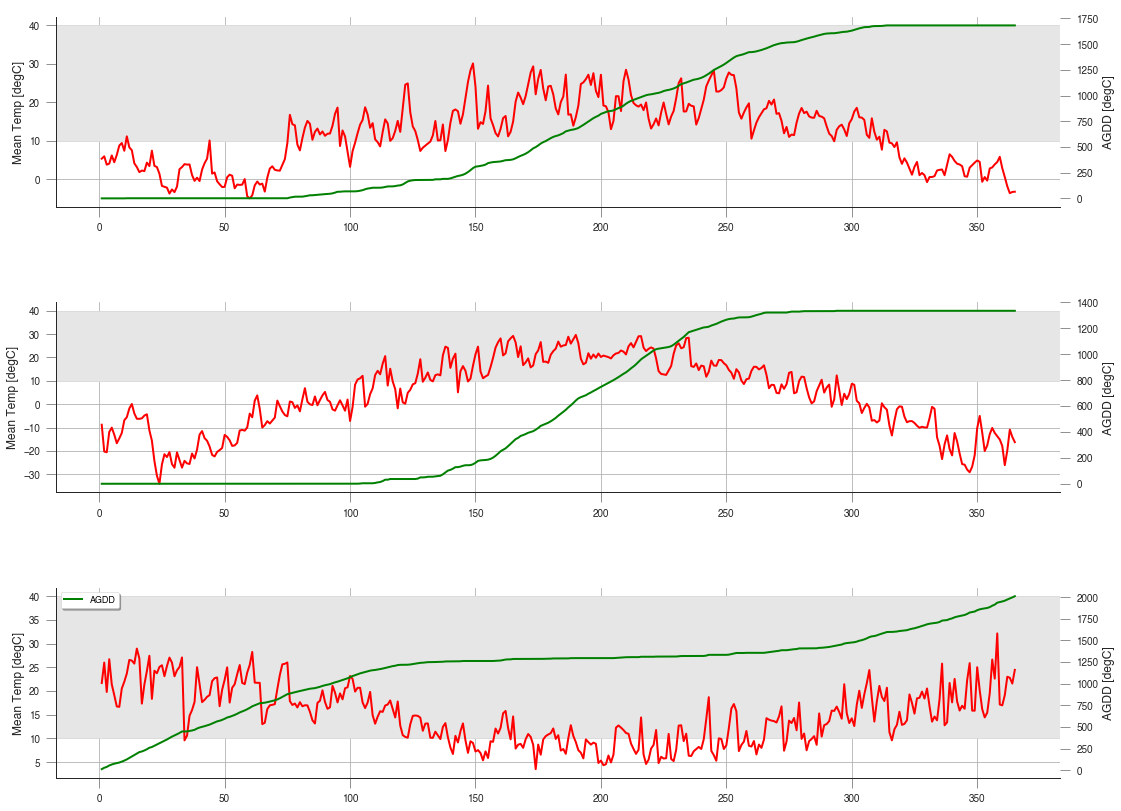

In [5]:
# Import some libraries, in case you haven't yet imported them
import matplotlib.pyplot as plt
import numpy as np
from phenology import *
# These next few lines retrieve the mean daily temperature and
# AGDD for the three sites mentioned above
tbase = 10.
tmax = 40.
# First load up temperature data
temp_hainich = get_temperature ( 2005, latitude=51, longitude=10 )
temp_tomsk = get_temperature ( 2005, latitude=57, longitude=86 )
temp_tumbarumba = get_temperature ( 2005, latitude=-35, longitude=148 )
# Calculate AGDD
agdd_hainich  = calculate_gdd( temp_hainich, tbase=tbase, tmax=tmax )
agdd_tomsk  = calculate_gdd( temp_tomsk, tbase=tbase, tmax=tmax )
agdd_tumbarumba  = calculate_gdd( temp_tumbarumba, tbase=tbase, tmax=tmax )
# Temporal range for plots
t_range =  np.arange ( 1, 366 )
# First subplot is Hainich (DE)
plt.figure(figsize=(18,14))
agdd_plots ( 3, 1, 10, 40, t_range, temp_hainich, agdd_hainich )
plt.grid ( False )
agdd_plots ( 3, 2, 10, 40, t_range, temp_tomsk, agdd_tomsk )
plt.grid ( False )
agdd_plots ( 3, 3, 10, 40, t_range, temp_tumbarumba, agdd_tumbarumba )
plt.grid ( False )
plt.xlabel("DoY/2005")
plt.rcParams['legend.fontsize'] = 9 # Otherwise too big
plt.legend(loc='best', fancybox=True, shadow=True ) # Legend


In [6]:
help(agdd_plots)

Help on function agdd_plots in module phenology:

agdd_plots(nplots, iplot, tbase, tmax, t_range, temp, agdd)
    This function does the AGDD plots in a nplots vertical stack of plots.
    iplot is the current plot (from top to bottom, starting at 1), tbase and
    tmax are the values used for AGDD calculations. t_range is a temporal range
    (usually DoY) and temp and AGDD are extracted 2m temperature and AGDD



Examine the previous plots, noting particularly the inflexion points in the AGDD curve, and how they relate to the base and maximum mean daily temperatures (shown in the grey area). Also not how for the Tumbarumba site, there is a seasonality shift with respect to the Northern Hemisphere sites.

You could also explore the impact of $t_{base}$ and $t_{max}$ on the AGDD.

Note that the temperature data we are using here are 2 m air temperature so there may be some offset between this and the temperature that the plants experience (and so that which controls phenology).

Remember also that there are other controls on how plants grow, so a simple temperature relationship might not always explain all variations (what other factors would control phenology?)

### A simple phenology model

Inspection of typical evolution of vegetation indices like the one carried out above suggest that a simple phenology model that goes from a minimum to a maximum and then decreases again may be suitable.

One such method used successfully in [De Beurs and Henebry (2008)](http://geography.vt.edu/deBeurs_Henebry_JClimate.pdf) by using a simple quadratic function of time:
$$
NDVI(t)=at^2+bt+c
$$

Fit parameters were: -2.35e-05 9.41e-03 -2.11e-01


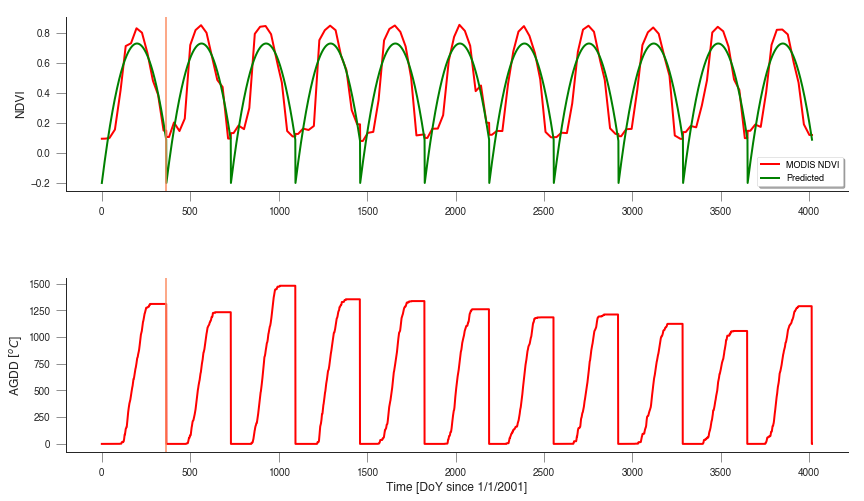

In [7]:
# The following line grabs the data, selects 2001 as the year we'll be
# fitting a qudratic model to, and returns the AGDD, NDVI, parameters,
# fitting output message, and forward modelled NDVI for the complete time
# series (2001-2011).
tbase = 10.
tmax = 40.
# First load up temperature data
temp= get_temperature ( latitude=57, longitude=86 )
retval = fit_phenology_model( 86, 57, [2001], temp, pheno_model="quadratic")

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(14,8))
axs=axs.flatten()

axs[0].plot ( retval[1], '-r', label="MODIS NDVI" )
axs[0].plot ( retval[-1], '-g', label="Predicted" )
axs[0].axvline ( 365, ymin=-0.1, ymax=1.01, lw=1.5)

axs[0].legend(loc='best', numpoints=1,fancybox=True, shadow=True ) # Legend

axs[0].set_ylabel("NDVI")

axs[1].plot ( retval[0], '-r' )
axs[1].axvline ( 365, ymin=-0.1, ymax=1.01, lw=1.5)
axs[1].set_xlabel ("Time [DoY since 1/1/2001]")
axs[1].set_ylabel (r'AGDD $[^{o}C$]')
 # Print out the fit parameters

print("Fit parameters were: %8.2e %8.2e %8.2e" % (retval[-3][0], retval[-3][1], retval[-3][2]))

In [8]:
help(fit_phenology_model)

Help on function fit_phenology_model in module phenology:

fit_phenology_model(longitude, latitude, year, temp, pheno_model, xinit=None, tbase=10, tmax=40, n_harm=3, do_agdd=False)
    This function fits a phenology model of choice for a given location and
    time period. The user can also modify the base and maximum temperature for
    AGDD calculations, as well as the number of harmonics used by the Fourier
    phenology model.



We can see that the quadratic model has some complications even fitting a simple NDVI profile like that of Siberia.

More relevantly, if we fit to the qudratic function of time, then we will predict the same phenology each year: one impact then of using AGDD instead of time is that we can control for different temperature regimes from one year to the next. In the example above, we have fitted the quadratic in time to data from the year 2001 and then show a comparison against all years.

In the previous code snippet, all the work is done by `fit_phenology_model`. This function returns a Python tuple with the following elements:

* AGDD (degrees) for the 11 years of data. Daily data.
* NDVI for the 11 years of data. Data have been linearly interpolated to daily.
* Optimal fit parameters
* Output message from `leastsq` (see [here](http://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html#least-square-fitting-leastsq) for more information)
* Predicted NDVI for 11 years from using the Optimal fit parameters.

We can also fit several years with the same parameters. Instead of specifying `[2001]`, we can specify a list with the years we want to fit together, such as `[2001, 2002, 2003, 2004]`.

It is interesting now to examine the data a bit more carefully, as a function of time, and as a function of AGDD. Note that AGDD is defined for a given minimum and maximum temperature. The default values are `tbase=10`, `tmax=40`.

Text(0.5, 0, 'Time')

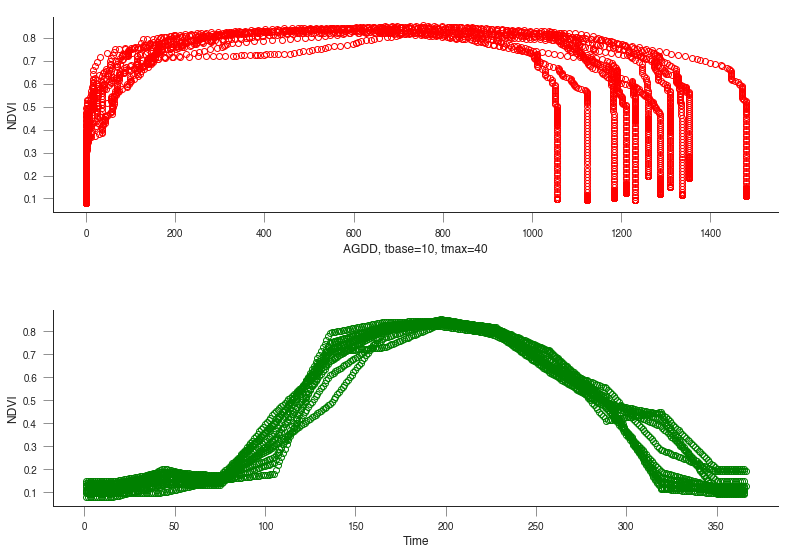

In [9]:
from scipy.optimize import leastsq
from phenology import *
tbase = 10.0
tmax = 40.0
# First load up temperature data
temp= get_temperature ( latitude=57, longitude=86 )
retval = fit_phenology_model( 86, 57, [2001], temp, pheno_model="quadratic", \
             tbase=tbase, tmax=tmax )

agdd = retval[0]
ndvi = retval[1]
# set up time information
t_axis = []
for y in range ( 2001, 2012 ):
    if y % 4 == 0: # leap year
        t_axis = np.r_[t_axis, np.arange ( 1, 367) ]
    else:
        t_axis = np.r_[t_axis, np.arange ( 1, 366) ]

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(13,9))
axs = axs.flatten()
axs[0].plot ( agdd, ndvi,  'o',markerfacecolor='none', markeredgecolor='r' )
axs[0].set_ylabel("NDVI")
axs[0].set_xlabel('AGDD, tbase=%g, tmax=%g'%(tbase,tmax))

axs[1].plot ( t_axis, ndvi, 'o',markerfacecolor='none', markeredgecolor='g' )
axs[1].set_ylabel("NDVI")
axs[1].set_xlabel('Time')

In this particular case, the NDVI curves are quite consistent as a function of time (lower panel), but their form is not very well approximated by a quadratic. This is why you will see spikes in the plot above for the fitted values (the green line).

More generally we would expect that AGDD would be a better mechanism for tracking: in this plot, it does not seem to be so. One thing we do notice though is that the ‘shape’ of the curve is (broadly) more like a quadratic: it no longer has the flat portions in the winter. You should be able to work out why that is so by thinking about how AGDD is formulated.

Lets now change the base temperature and look for consistency:

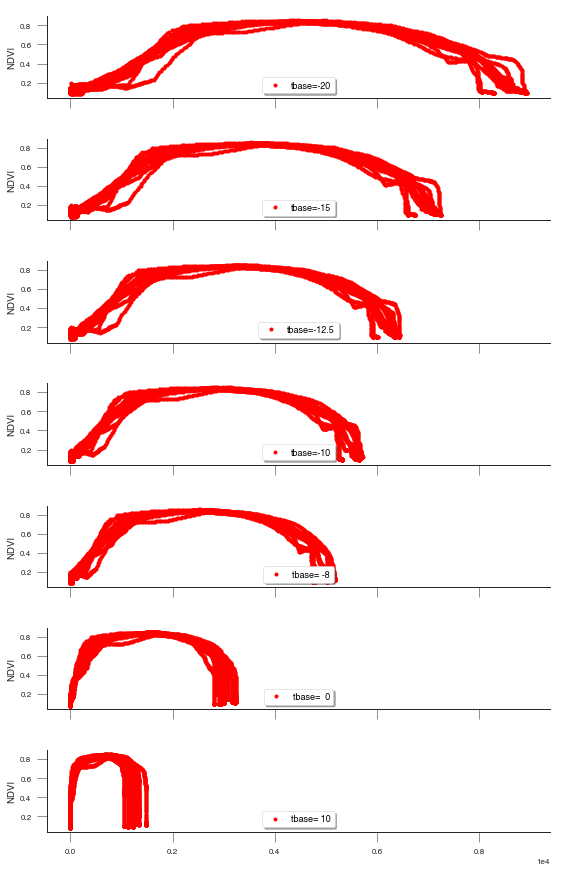

In [10]:
years = np.arange(2001,2012)
# get the NDVI for  tomsk
lat = 57.
lon = 86.

tmax = 40.
temp = get_temperature ( latitude=lat, longitude=lon )
ndvi = get_ndvi ( lon, lat )/10000.
ndvi = interpolate_daily ( ndvi )


# which base temperatures to use
tbases = np.array([-20., -15.,-12.5, -10.,-8.0,0.0,10.])
iplot = 1
plt.rcParams['legend.fontsize'] = 9
plt.rcParams['font.size'] = 8
fig, axs = plt.subplots(ncols=1, nrows=len(tbases), 
                        sharex=True, sharey=True,
                       figsize=(9, 15))
axs=axs.flatten()
for ii, tbase in enumerate(tbases):
    agdd = calculate_gdd ( temp, tbase=tbase, tmax=tmax )
    # plot ndvi as fn of AGDD
    axs[ii].plot ( agdd, ndvi, 'r.',label='tbase=%3G'%tbase)
    axs[ii].set_ylabel("NDVI")
    axs[ii].legend(loc=8,numpoints=1, fancybox=True, shadow=True ) # Legend
    iplot += 1

We can see that the ‘true’ $t_{base}$ should be around $−10^{\circ}C$ here from this (its where things ‘line up’ best). We could also have come to that conclusion by examing the mean temperature and AGDD plots above and taking note of the ‘active’ time of the vegetation (look at the NDVI between about DOY 100 and 320).

Text(0, 0.5, 'AGDD $[^{o}C]')

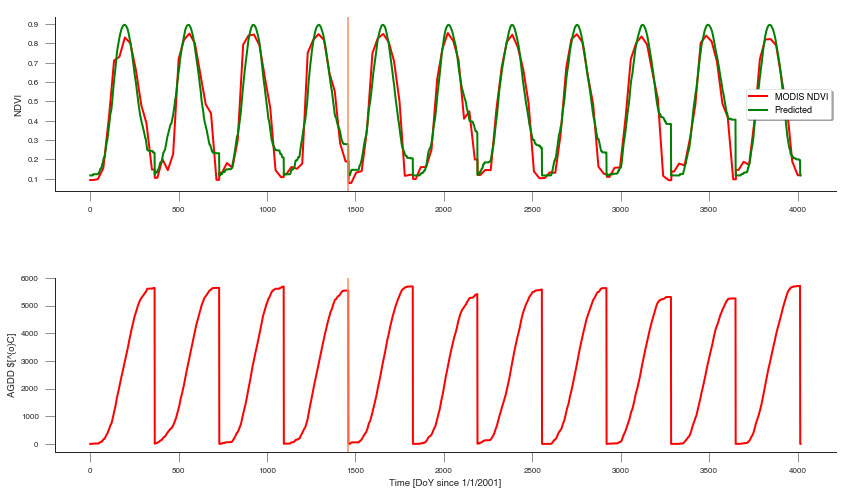

In [11]:
years = np.arange(2001,2012)
# get the NDVI for  tomsk
lat = 57.
lon = 86.

tmax = 40.
tbase = -10.
temp = get_temperature ( latitude=lat, longitude=lon )
retval = fit_phenology_model( lon, lat,  [2001,2002,2003,2004], temp, \
          tbase=tbase,tmax=tmax,pheno_model="quadratic",do_agdd=True )
agdd = np.array([retval[0]*retval[0],retval[0],retval[0]*0.+1])
# model parameters
params = retval[-3]
# fwd model
fwd = np.dot(agdd.T,params)

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(14,8))
axs=axs.flatten()
axs[0].plot ( retval[1], '-r', label="MODIS NDVI" )
axs[0].plot ( fwd, '-g', label="Predicted" )
axs[0].axvline ( 365*4, ymin=-0.1, ymax=1.01, lw=1.5)
#plt.rcParams['legend.fontsize'] = 9 # Otherwise too big
axs[0].legend(loc='best', fancybox=True, shadow=True ) # Legend
#plt.grid ( True )
axs[0].set_ylabel("NDVI")

axs[1].plot ( retval[0], '-r' )
axs[1].axvline ( 365*4, ymin=-0.1, ymax=1.01, lw=1.5)
axs[1].set_xlabel ("Time [DoY since 1/1/2001]")
axs[1].set_ylabel (r'AGDD $[^{o}C]')

### Experimentation

You should use code based on what is above to explore the modelling of phenology at some different sites (sall you need to know is the latitude and longitude).

What you should pay attention to is:

* visualise the the NDVI for all years and overplotted as a function of day of year (DoY). This will give you some indication of the variation in phenology at your site.
* visualise the temperature and AGDD data for your site. You need to get a feeling for the temperature range and where likely thresholds would be for tbase (and possible tmax. The current version of the code does not easily allow you to solve for these variables (that is just a coding issue though) so you will have to set what you think are good values for these. You can tell this broadly (as above) by comparing the temperature data with the NDVI data (‘when is it active?’, ‘when is it flat (if ever)?’)
* fit the model to the data using one or more years of data. Test how well its fits to these data, and test how well it performs in extrapolation (i.e. how well you can predict the phenology of years not used in the calibration).
* If you have time, you might examine some nearby locations to see if the phenology (and the model parameters) are similar. You might find it more fruitful to start with to examine a range of different sites however.
* If you get time, try to think about how you would define a phenology metric from this function we have fitted (i.e. at what AGDD should a DGVM start activating its photosynthesis mechanisms for this area?).
* There is a lot of literature on this subject, and it is not all of very high quality. Read through a selection of papers and consider if they have taken account of some of the things you have noted from your experimentation today.
* Remember that there are other factors that affect phenology, other than AGDD. Make sure you think about these when you are exploring different sites.
* Remember also that there will be a phase shift for phenologies in the Southern hemisphere!

# Appendices

There are some other functions in the code supplied, such as Fourier analysis and double logistics which you will find in the literature and may like to explore that you may like to try if you get time.

Other methods to fit a model to observations of NDVI rely on Fourier analysis ideas. Fourier analysis states that within a closed interval, any periodic function can be expressed as a sum of increasing frequency sine waves:
$$
NDVI(t) = \overline{NDVI}(t) + \sum_{i=1}^{N}A_{i}\cos(2\pi i t/N + \phi_{c,i})+ \sum_{i=1}^{N}B_{i}\sin(2\pi i t/N + \phi_{s,i})
$$

where $\overline{NDVI}(t)$ is the mean NDVI value within the period of interest $(0,N)$. $A_i$ and $\phi_i$ are the magnitude and phase of the $i$-th harmonic, respectively. Usually, only a few terms of the summation are required to produce a reasonable fit to the observations. An added benefit is that the different harmonics allow for a more detailed exploration of the temporal dynamics observed by the sensor: the first term (the 0-th harmonic) can be related to the mean biome amount of vegetation. The first and second harmonics relate to the dynamics of annual and biannual evoluation of vegetation. Finally, frequency-domain analysis is fairly robust against noise. However, there are some shortcomings: data gaps need to be filled in or “padded”, and the frequency at which one can extract information is governed by the periodicity of the data, wihch in our case is monthly. Also, fast events might be blurred. For a more in-depht analysis, see e.g. [Moody and Johnson (2001)](ftp://ftp.ccrs.nrcan.gc.ca/ftp/ad/Phenology/PhenologyPapers/Moody_2001_AVHRR_DFourierTransPhenology_USA.pdf)], and the related slightly more sophisticated method presented in [Hernance et al. (2007)](http://ieeexplore.ieee.org//xpls/abs_all.jsp?arnumber=4305366).

[ 0.46118902 -0.11735403  0.51332214 -0.31382197  0.88656189 -0.02006997
 -2.52876843 -0.02216068  0.24513643  0.35547242  1.14430677  0.3540133
 -0.38491468]


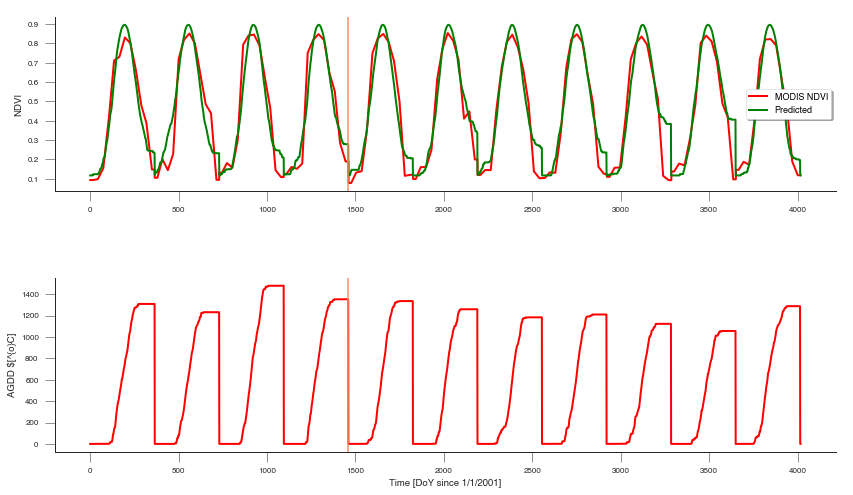

In [12]:
# The following line grabs the data, selects 2001 as the year we'll be
# fitting a qudratic model to, and returns the AGDD, NDVI, parameters,
# fitting output message, and forward modelled NDVI for the complete time
# series (2001-2011).
temp = get_temperature ( latitude=57, longitude=86 )
retval = fit_phenology_model( 86, 57, [2001], temp, pheno_model="fourier")
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(14,8))
axs=axs.flatten()
axs[0].plot ( retval[1], '-r', label="MODIS NDVI" )
axs[0].plot ( fwd, '-g', label="Predicted" )
axs[0].axvline ( 365*4, ymin=-0.1, ymax=1.01, lw=1.5)
#plt.rcParams['legend.fontsize'] = 9 # Otherwise too big
axs[0].legend(loc='best', fancybox=True, shadow=True ) # Legend
#plt.grid ( True )
axs[0].set_ylabel("NDVI")

axs[1].plot ( retval[0], '-r' )
axs[1].axvline ( 365*4, ymin=-0.1, ymax=1.01, lw=1.5)
axs[1].set_xlabel ("Time [DoY since 1/1/2001]")
axs[1].set_ylabel (r'AGDD $[^{o}C]')
print(retval[-3]) # Print out the fit parameters

This code demonstrates that the fit using the Fourier model is good, as the VI trajectory we are using can be well approximated by a sum of sinusoids. Note that since in this case we also solve for phase shifts, this model fits other type of phenologies, such as the Tumbarumba site, quite well:

[ 0.56977258 -0.55806185  0.78755609 -0.6011453  -0.54826658 -0.05731232
 -0.30378172  0.01893108 -0.92887428 -0.05047571  1.90489246  0.05550766
 -2.45601872]


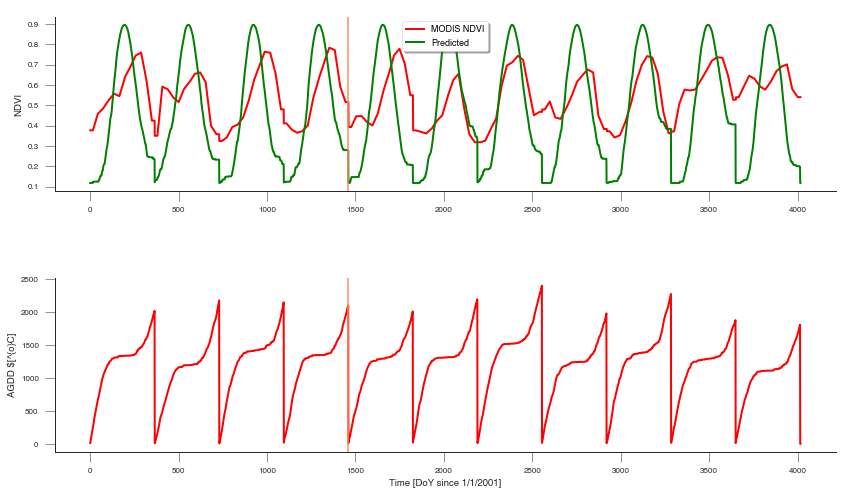

In [13]:
# The following line grabs the data, selects 2001 as the year we'll be
# fitting a qudratic model to, and returns the AGDD, NDVI, parameters,
# fitting output message, and forward modelled NDVI for the complete time
# series (2001-2011).
temp = get_temperature ( latitude=-35, longitude=148 )
retval = fit_phenology_model( 148, -35, [2001], temp, pheno_model="fourier")
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(14,8))
axs=axs.flatten()
axs[0].plot ( retval[1], '-r', label="MODIS NDVI" )
axs[0].plot ( fwd, '-g', label="Predicted" )
axs[0].axvline ( 365*4, ymin=-0.1, ymax=1.01, lw=1.5)
#plt.rcParams['legend.fontsize'] = 9 # Otherwise too big
axs[0].legend(loc='best', fancybox=True, shadow=True ) # Legend
#plt.grid ( True )
axs[0].set_ylabel("NDVI")

axs[1].plot ( retval[0], '-r' )
axs[1].axvline ( 365*4, ymin=-0.1, ymax=1.01, lw=1.5)
axs[1].set_xlabel ("Time [DoY since 1/1/2001]")
axs[1].set_ylabel (r'AGDD $[^{o}C]')
print(retval[-3]) # Print out the fit parameters

Other models have been developed in the literature, that make use of different temporal template shapes (such as asymetric Gaussian functions, or the double logistic function). A double logistic model (after e.g. Zhang et al. (2003) or Sobrino and Julien (2011) ) is given by

$$
\begin{split}NDVI(t) &= NDVI_{0} + \Delta NDVI\cdot\left[\frac{1}{1+\exp(m_{s}(t-s))}+  \frac{1}{1+\exp(m_{a}(t-a))} - 1 \right]\end{split}
$$

The model effectively has 6 parameters, of which two relate to the variation in the vegetation index ($NDVI_0$, the minimum value of the VI, and $\Delta NDVI$, the difference between maximum and minimum NDVI). The other parameters relate to the shape of the ascending logistic function that models greening up ($m_s$ and $s$) and the onset of senescence ($m_a$ and $a$). We can relate $s$ and $a$ to the beginning and end of the photosynthetically active period (i.e., shift in time), and $m_s$ and $m_a$ to the location of the inflexion point in the logistic curves.

[ 7.69056533e-02 -7.58458804e-01  5.09747095e-02  1.10581630e+02
  3.28907511e-02  2.98796975e+02]


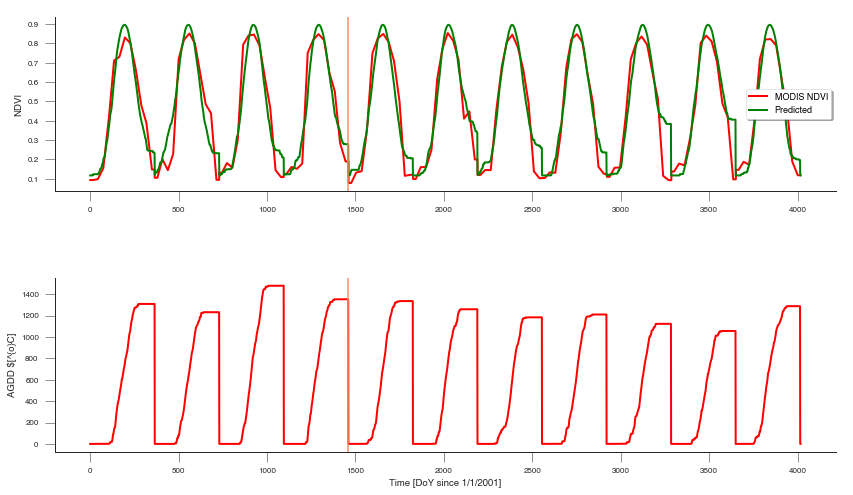

In [14]:
# The following line grabs the data, selects 2001 as the year we'll be
# fitting a qudratic model to, and returns the AGDD, NDVI, parameters,
# fitting output message, and forward modelled NDVI for the complete time
# series (2001-2011).
temp = get_temperature ( latitude=57, longitude=86 )
retval = fit_phenology_model( 86, 57, [2001], temp, \
        pheno_model="dbl_logistic")
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(14,8))
axs=axs.flatten()
axs[0].plot ( retval[1], '-r', label="MODIS NDVI" )
axs[0].plot ( fwd, '-g', label="Predicted" )
axs[0].axvline ( 365*4, ymin=-0.1, ymax=1.01, lw=1.5)
#plt.rcParams['legend.fontsize'] = 9 # Otherwise too big
axs[0].legend(loc='best', fancybox=True, shadow=True ) # Legend
#plt.grid ( True )
axs[0].set_ylabel("NDVI")

axs[1].plot ( retval[0], '-r' )
axs[1].axvline ( 365*4, ymin=-0.1, ymax=1.01, lw=1.5)
axs[1].set_xlabel ("Time [DoY since 1/1/2001]")
axs[1].set_ylabel (r'AGDD $[^{o}C]')
print (retval[-3]) # Print out the fit parameters

### Estimating timing information

 In the previous section we have fitted phenological models to observations of vegetation indices. We can use the parameters that we recovered for each year to relate them to meteorological observations, or to look for trends. 
 
 A way to explore this is to use the fitted models and look for their inflexion points. These smooth functionals are easy to inspect than the noisy NDVI series (particularly if you were using daily data with no angular correction). You can find an analytic expression for the onset of greenness and start of senescence as (respectively) the maximum and minimum value of the first derivative.

Text(0.5, 1.0, 'Tomsk \nAGDD OG:      2.1 AGDD OS:   1308.9 AGDD AP:  1306.8')

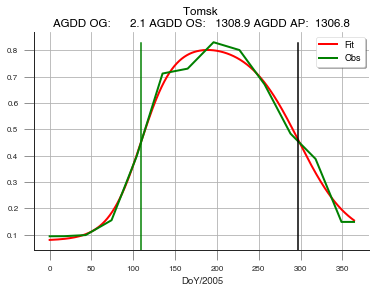

In [15]:
# The following line grabs the data, selects 2001 as the year we'll be
# fitting a qudratic model to, and returns the AGDD, NDVI, parameters,
# fitting output message, and forward modelled NDVI for the complete time
# series (2001-2011).
temp = get_temperature ( latitude=57, longitude=86 )
retval = fit_phenology_model( 86, 57, [2001], temp, \
        pheno_model="dbl_logistic")
# Plot the fitted curve for year 2001
plt.plot ( retval[-1][:365], '-r', label="Fit")
# Plot the observations of NDVI
plt.plot ( retval[1][:365], '-g', label="Obs")
# Onset of senescence is the minimum of the derivative
doy_senesc = np.diff(retval[-1][:365]).argmin()
# I get 297 for this
# Onset of greenness is the minimum of the derivative
doy_green = np.diff(retval[-1][:365]).argmax()
# I get 109 for my example
plt.axvline ( doy_green, ymin=0, ymax=0.95, color='g', lw=1.5 )
plt.axvline ( doy_senesc, ymin=0, ymax=0.95, color='k', lw=1.5 )
plt.grid ( True )
plt.xlabel("DoY/2005")

plt.legend(loc='best', fancybox=True, shadow=True ) # Legend
plt.title ( "Tomsk \nAGDD OG: %8.1f AGDD OS: %8.1f AGDD AP:%8.1f" % \
    ( retval[0][doy_green], retval[0][doy_senesc], \
    retval[0][doy_senesc] - retval[0][doy_green] ) )